## Modeling and Conclusion
* [1. Packages](#Packages)
* [2. Load Train Data](#Train_Data)
* [3. Load Models and Scoring Metrics](#Load_Models)
  * [3a. Predict Comparisons](#Predict_Comparisons)
  * [3b. Accuracy Comparisons](#Accuracy_Comparisons)
  * [3c. F1_Macro Score Comparisons](#F1_Comparisons)
  * [3d. Confusion Matrix Comparisons](#Confusion_Comparisons)
* [4. Kaggle Output Data and Final Model Testing](#Kaggle)
* [5. Follow Up](#Follow_Up)
  * [5a. Feature Importance](#Feature_Importance)
  * [5b. Sufficient Training Size](#Training_Size)
  * [5c. Missing Data](#Missing_Data)
  * [5d. Class Imbalance](#Class_Imbalance)
* [6 Future Follow-Up Projects](#Follow-Up_Projects)

### 1. Packages <a id='Packages'></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 2. Load Train Data <a id='Train_Data'></a>

In [26]:
# Local Linked
train_data = pd.read_csv("..\\Data\\train_data_EDA_processed.csv", index_col=0)

In [27]:
train_data.head()

,Patient_Age,Mother_Gene,Father_Gene,Maternal_Gene,Paternal_Gene,Blood_Cell,Respiratory_Rate,Heart_Rate,Follow_Up,Gender,...,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Disorder_Subclass,Father_Patient_Birth_Age,Mother_Patient_Birth_Age,Status_Birth_Defect
0,2.0,Yes,No,Yes,No,4.760603,Normal (30-60),Normal,High,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,Leber's hereditary optic neuropathy,NaN,NaN,Alive
1,4.0,Yes,Yes,No,No,4.910669,Tachypnea,Normal,High,NaN,...,normal,1.0,NaN,1.0,1.0,0.0,Cystic fibrosis,19.0,NaN,No
2,6.0,Yes,No,No,No,4.893297,Normal (30-60),Tachycardia,Low,NaN,...,normal,0.0,1.0,1.0,1.0,1.0,Diabetes,16.0,35.0,Alive
3,12.0,Yes,No,Yes,No,4.705280,Tachypnea,Normal,High,Male,...,NaN,0.0,0.0,1.0,0.0,0.0,Leigh syndrome,NaN,9.0,No
4,11.0,Yes,No,NaN,Yes,4.720703,Tachypnea,Tachycardia,Low,Male,...,NaN,0.0,0.0,0.0,0.0,NaN,Cancer,NaN,21.0,Alive


In [32]:
# Split the data into feature X and target y
X = train_data.drop(columns="Disorder_Subclass")
y = train_data.Disorder_Subclass

# Label encode target y
le = LabelEncoder()
encoded_y = le.fit_transform(y)

### 3. Load Models and Scoring Metrics <a id='Load_Models'></a>

In [33]:
# Load the Models
Initial_Model = joblib.load('..\\Model\\initial_model.pkl')
Best_Model = joblib.load('..\\Model\\best_model.pkl')

#### 3a. Predict Comparisons <a id='Predict_Comparisons'></a>

In [40]:
# Initial Model Prediction Score
initial_pred = Initial_Model.predict(X)

print(accuracy_score(encoded_y, initial_pred) * 100)

92.52824504142606


In [42]:
# Best Model Prediction Score
best_pred = Best_Model.predict(X)

print(accuracy_score(encoded_y, best_pred) * 100)

73.88400702987697


#### 3b. Accuracy Comparisons <a id='Accuracy_Comparisons'></a>

In [43]:
# Initial Model Accuracy Score
scores = cross_val_score(Initial_Model, X, encoded_y, cv=5, scoring="accuracy")
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [37.15792116 36.80642732 38.1370826  37.03238765 37.55962842]
Mean: 37.33868943007783
Standard Deviation: 0.004681979493222211


In [44]:
# Best Model Accuracy Score
scores = cross_val_score(Best_Model, X, encoded_y, cv=5, scoring="accuracy")
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [39.44263118 38.41325634 41.30052724 39.49284459 39.76901833]
Mean: 39.68365553602812
Standard Deviation: 0.009305886944101354


#### 3c. F1_Macro Score Comparisons <a id='F1_Comparisons'></a>

In [46]:
# Initial Model F1_Macro Score
scores = cross_val_score(Initial_Model, X, encoded_y, cv=5, scoring="f1_macro", n_jobs=-1)
print("F1_Macro Scores:", scores * 100)
print("F1_Macro Scores Mean:", scores.mean() * 100)
print("F1_Macro Scores Standard Deviation:", scores.std())

F1_Macro Scores: [28.53297058 29.77935165 29.07929415 26.20936957 29.18842866]
F1_Macro Scores Mean: 28.557882922571004
F1_Macro Scores Standard Deviation: 0.012391593127157244


In [47]:
# Best Model F1_Macro Score
scores = cross_val_score(Best_Model, X, encoded_y, cv=5, scoring="f1_macro", n_jobs=-1)
print("F1_Macro Scores:", scores * 100)
print("F1_Macro Scores Mean:", scores.mean() * 100)
print("F1_Macro Scores Standard Deviation:", scores.std())

F1_Macro Scores: [30.3439153  30.44573292 33.66749274 28.9768262  30.79848362]
F1_Macro Scores Mean: 30.84649015461317
F1_Macro Scores Standard Deviation: 0.015407265425193044


#### 3d. Confusion Matrix Comparisons <a id='Confusion_Comparisons'></a>

In [51]:
# Initial Model Confusion Matrix
print(classification_report(encoded_y, initial_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00        97
           2       0.93      0.94      0.93      3448
           3       0.98      0.96      0.97      1817
           4       0.96      0.96      0.96      1355
           5       0.99      0.99      0.99       648
           6       0.90      0.91      0.90      5160
           7       0.91      0.91      0.91      4405
           8       0.92      0.91      0.91      2833

    accuracy                           0.93     19915
   macro avg       0.95      0.95      0.95     19915
weighted avg       0.93      0.93      0.93     19915



In [52]:
# Best Model Confusion Matrix
print(classification_report(encoded_y, best_pred))

              precision    recall  f1-score   support

           0       0.85      0.30      0.45       152
           1       0.71      0.30      0.42        97
           2       0.73      0.82      0.77      3448
           3       0.82      0.67      0.74      1817
           4       0.77      0.60      0.67      1355
           5       0.82      0.51      0.63       648
           6       0.73      0.78      0.75      5160
           7       0.73      0.78      0.75      4405
           8       0.74      0.69      0.71      2833

    accuracy                           0.74     19915
   macro avg       0.76      0.61      0.66     19915
weighted avg       0.74      0.74      0.74     19915



### 4. Kaggle Output Data and Final Model Testing <a id='Kaggle'></a>

In [67]:
# Load Test Data
test_data = pd.read_csv("..\\Data\\test_data_EDA_processed.csv", index_col=0)
test_data_raw = pd.read_csv("..\\Data\\Raw Data\\test.csv")

# Inital Output Data Frame
output_df = pd.DataFrame(test_data_raw["Patient Id"])

In [73]:
# Disorder Subclass Predictions
Disorder_Subclass_Predictions = le.inverse_transform(Best_Model.predict(test_data))

In [74]:
# Kaggle Submission Requires Genetic Disorder Column
# But this is directly related to Disorder Subclass hierarchically

Genetic_Disorder = []

for val in Disorder_Subclass_Predictions:
    if val == "Cystic fibrosis":
        Genetic_Disorder.append("Single-gene inheritance diseases")
    elif val == "Hemochromatosis":
        Genetic_Disorder.append("Single-gene inheritance diseases")
    elif val == "Tay-Sachs":
        Genetic_Disorder.append("Single-gene inheritance diseases")
    elif val == "Diabetes":
        Genetic_Disorder.append("Multifactorial genetic inheritance disorders")
    elif val == "Cancer":
        Genetic_Disorder.append("Multifactorial genetic inheritance disorders")
    elif val == "Alzheimer's":
        Genetic_Disorder.append("Multifactorial genetic inheritance disorders")
    else: Genetic_Disorder.append("Mitochondrial genetic inheritance disorders")

In [75]:
# Kaggle File Submission Format
output_df["Genetic Disorder"] = Genetic_Disorder
output_df["Disorder Subclass"] = Disorder_Subclass_Predictions

output_df.head()

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x4175,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x21f5,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
2,PID0x49b8,Single-gene inheritance diseases,Tay-Sachs
3,PID0x2d97,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x58da,Single-gene inheritance diseases,Cystic fibrosis


In [76]:
# Save File for Submission
output_df.to_csv('../Data/outputPredicted.csv')

The attached link goes to the hackerearth leaderboard for this ML challenge. For reference, my model generated a score of 33.56 out of 100, which places my model between the rank 56 and 57. The top score was 37.9. My score doesn't show up on the leaderboard since this challenege completed on August 15, 2021.

https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-genetic-testing/leaderboard/predict-the-genetic-disorders-9-76826a5e/

### 5. Follow Up <a id='Follow_Up'></a>

#### 5a. Feature Importance <a id='Feature_Importance'></a>

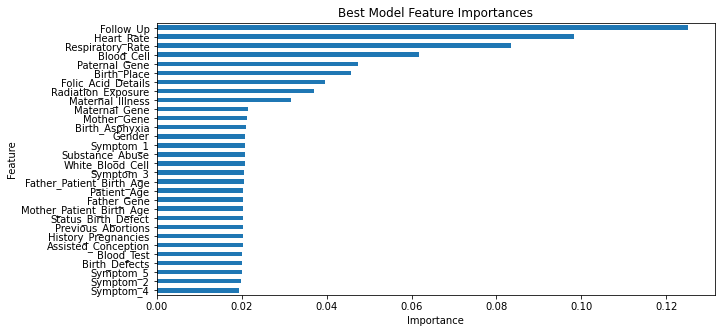

In [61]:
plt.subplots(figsize=(10, 5))
imps_features = Best_Model.feature_importances_
best_model_imps = pd.Series(imps_features, index=Best_Model.X_columns).sort_values(ascending=True)
best_model_imps.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Best Model Feature Importances');
plt.show()

After the top 9 features that provided the largest impact for the model, all the other features have similar importance. A follow-up project would be more feature engineering to bring out more of the importances in these features.

#### 5b. Sufficient Training Size <a id='Training_Size'></a>

In [62]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(Best_Model, X, encoded_y, train_sizes=fractions, n_jobs=-1, random_state=123)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

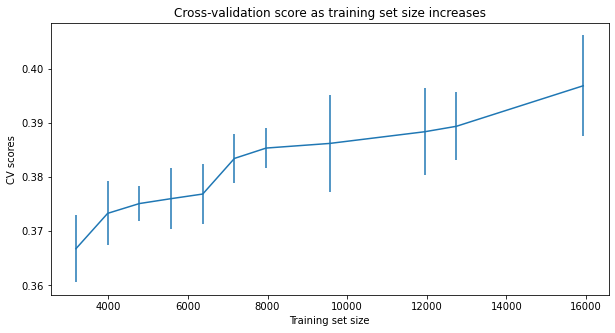

In [63]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');
plt.show()

It looks like the CV scores continue to increase with more training data. This means more medical data to train on would help increase the modeling power and can be a follow-up task on for this project.

#### 5c. Missing Data <a id='Missing_Data'></a>

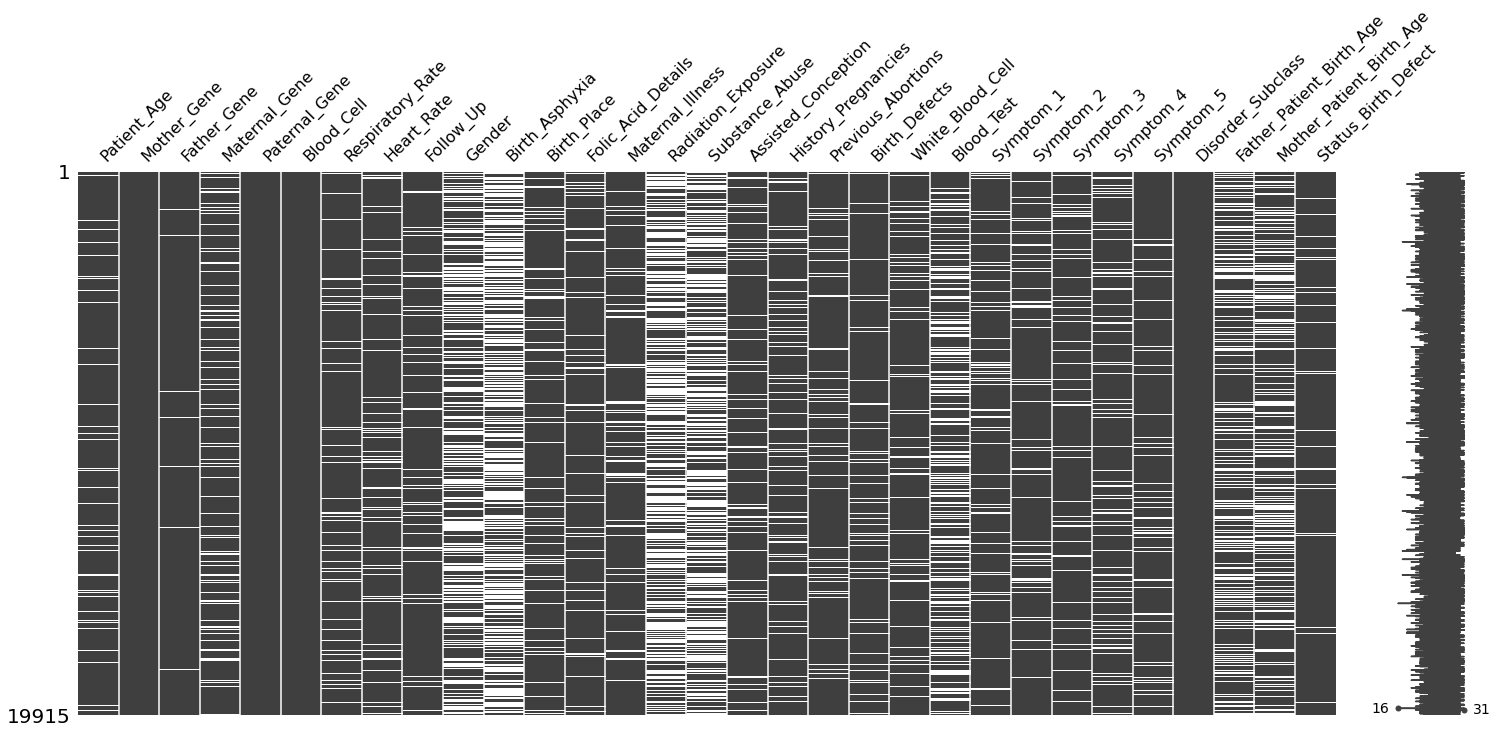

In [64]:
msno.matrix(train_data)
plt.show()

There are significant amount of missing data for a few of these features. New featurese should either be engineered or added for data collection to compensate for these missing values.

#### 5d. Class Imbalance <a id='Class_Imbalance'></a>

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder_Subclass, dtype: int64


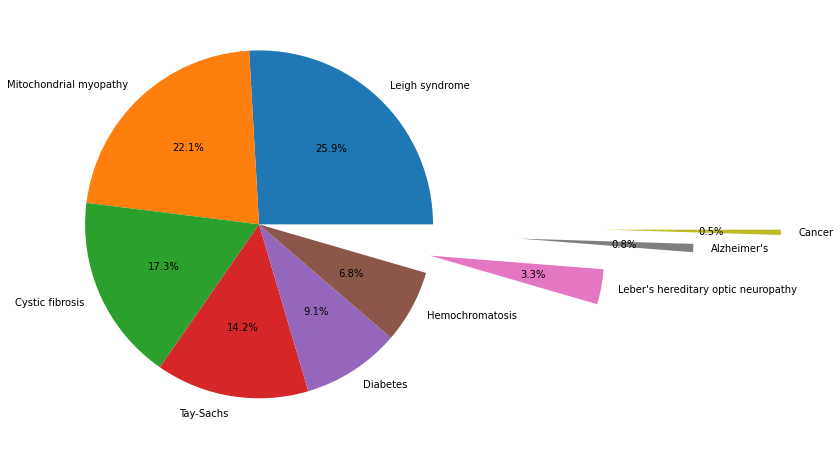

In [65]:
# Disorder Subclass Distribution
ds_counts = train_data.Disorder_Subclass.value_counts()
print(ds_counts)

plt.figure(figsize=(8,8))

mylab = ds_counts.index
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1.5, 2)

plt.pie(ds_counts, labels=mylab, explode=explode, autopct='%1.1f%%')
plt.show()

There was also a significant class imbalance that made modeling for the minor classes difficult, since it reduces the modeling power for the majority classes. More data collected for the minority classes would significantly benefit the modeling, but also I could test out other types of class imbalance techniques.

### 6. Future Follow-Up Projects <a id='Follow-Up_Projects'></a>

Given the difficulty and limitability of the current data set provided, a more meaningful approach may be to predict the probability of the genetic disorders. This will guide healthcare providers and doctors towards potential genetic disorder or areas, where they may apply their expert field knowledge and investigational abilities to properly identify the disease.